In [1]:
import pandas as pd
from pathlib import Path

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/sample_submission.csv
/kaggle/input/test.csv.zip
/kaggle/input/train.csv.zip
/kaggle/input/description.md
/kaggle/input/sample_submission.csv.zip
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/description.md
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Training data
train = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
# Testing data
test = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
# sample 
sample = pd.read_csv('../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip')


In [5]:
#train['comment_text'].iloc[125698]


In [6]:
pd.set_option('display.max_colwidth', None)
train['comment_text'].sample(5)


138739                                                                                                     If it isn't Gunga-Din, the loyal water bearer and janitor offering his services to every white dude on the planet. If Subramaniam was around in the days of the Raj, he would have been in the personal service of the Viceroy.
35660                                                                                                                                                                                                   Wait a sec, it would appear that CHORSEL is a real game. My apologies for my error. If you wish I will rewrite your edits for you.
86288                                                                                                                                                                                                                                                             That is how they work in a neutral Encyclopedia, I guess this isn't one.
67315  

In [7]:
# problems in data
#[User:Cirt]]
#200.83.101.199
#(Romania)
#hi moron
# URLs


In [8]:
# Label column names
labels = list(train.columns[2:])
labels


['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [9]:
label = train[['toxic', 'severe_toxic' , 'obscene' , 'threat' , 'insult' , 'identity_hate']]
print(label.head())


   toxic  severe_toxic  obscene  threat  insult  identity_hate
0      0             0        0       0       0              0
1      0             0        0       0       0              0
2      0             0        0       0       0              0
3      0             0        0       0       0              0
4      0             0        0       0       0              0


In [10]:
ct1,ct2 = 0,0
for i in range(label.shape[0]):
    ct = np.count_nonzero(label.iloc[i])
    if ct :
        ct1 = ct1+1
    if ct>1 :
        ct2 = ct2+1
print(ct1)
print(ct2)


16225
9865


average length of comment: 394.073


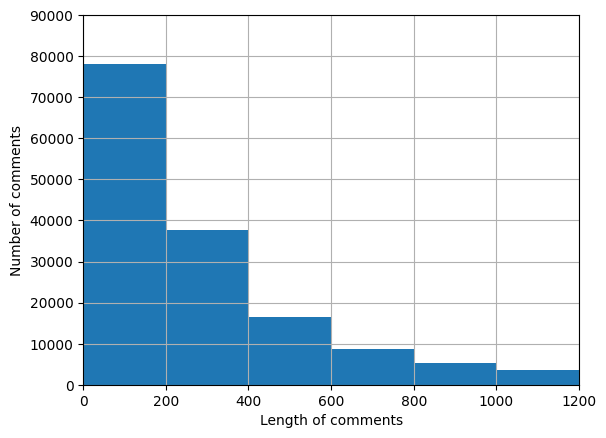

In [11]:
x = [len(train['comment_text'][i]) for i in range(train['comment_text'].shape[0])]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


In [12]:
label.head(1)


,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0


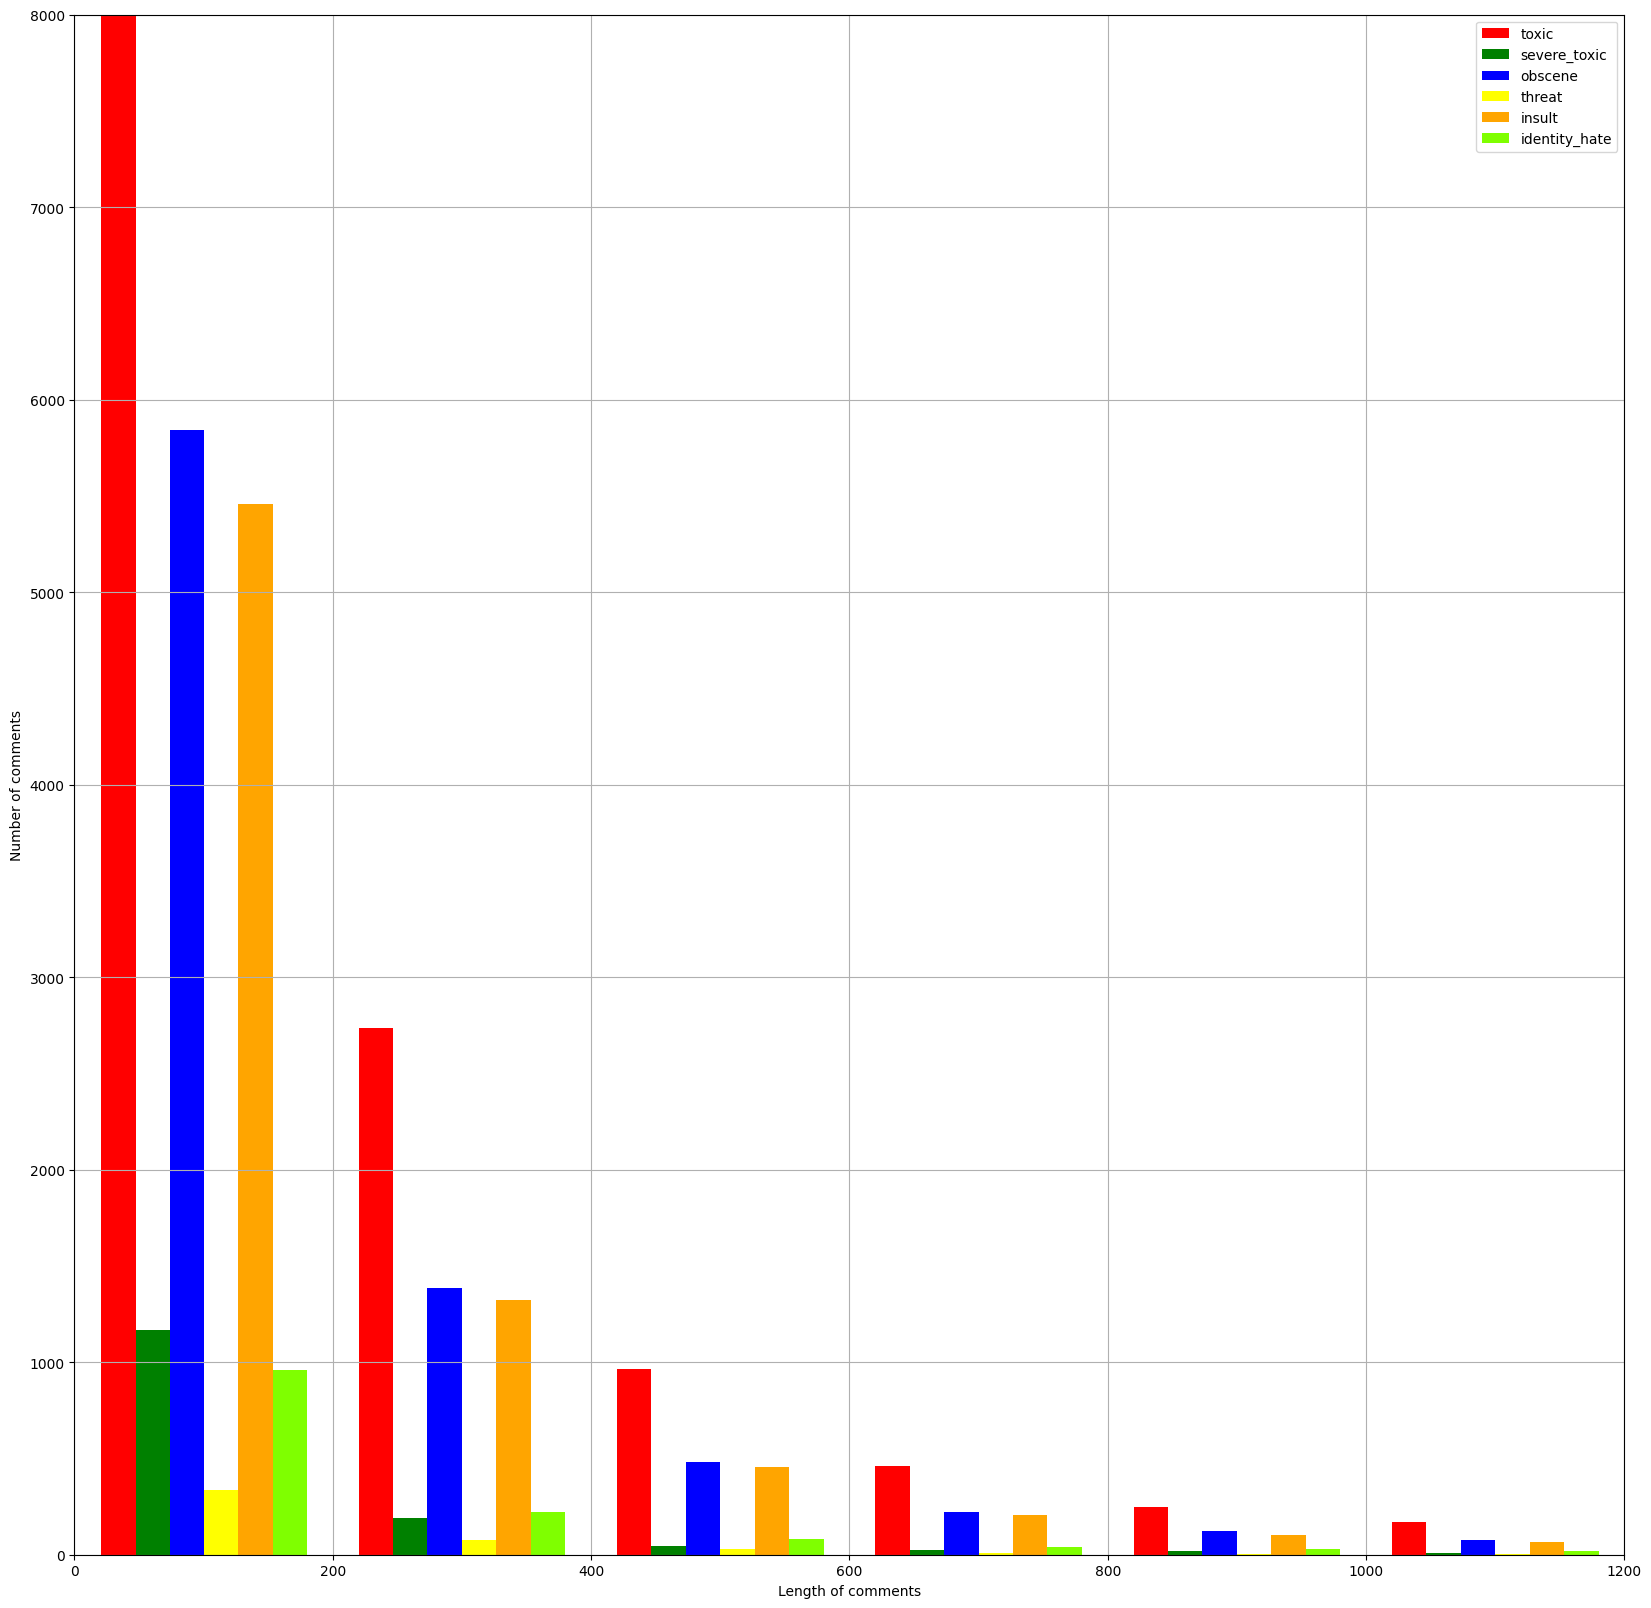

In [13]:
y = np.zeros(label.shape)
for ix in range(train['comment_text'].shape[0]):
    l = len(train['comment_text'][ix])
    if label['toxic'].iloc[ix] :
        y[ix][0] = l
    if label['severe_toxic'].iloc[ix] :
        y[ix][1] = l
    if label['obscene'].iloc[ix] :
        y[ix][2] = l
    if label['threat'].iloc[ix] :
        y[ix][3] = l
    if label['insult'].iloc[ix] :
        y[ix][4] = l
    if label['identity_hate'].iloc[ix] :
        y[ix][5] = l

labelsplt = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
color = ['red','green','blue','yellow','orange','chartreuse']  
plt.figure(figsize=(20,20))
plt.hist(y,bins = bins,label = labelsplt,color = color)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()


<BarContainer object of 6 artists>

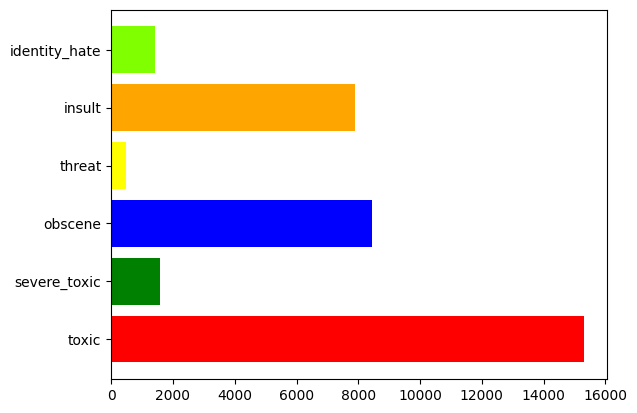

In [14]:
plt.barh(labelsplt,train[labels].sum(axis = 0),color = color)


In [15]:
# get value counts for each class
train[labels].sum(axis = 0)


toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [16]:
# get number of comments that have been classified (toxic)
# comments_classified = sum(train[labels].sum(axis = 1) !=0)
# comments_classified


In [17]:
# comments_not_classified = comments - comments_classified
# print(f"there are {comments_not_classified} not toxic comments in the dataset")


In [18]:
# # adding not toxic column
# condition = train[labels].sum(axis = 1) == 0
# train['not_toxic'] = np.where(condition, 1,0)


In [19]:
# # checking if there is an undefined toxicity type
# sum(train[labels].sum(axis = 1) == 1)


In [20]:
# # adding toxicity undefined column
# condition = train[labels].sum(axis = 1) == 1
# train['undefined_toxic'] = np.where(condition, 1,0) 


In [21]:
# # checking if there is a comment classified with a toxic type without classifying it as toxic
# train['toxicity_type_defined'] = train[['insult','obscene','identity_hate','threat']].max(axis=1)
# condition = (train['toxicity_type_defined']==1) & (train['toxic']==0)
# train['soft_toxic'] = np.where(condition, 1,0)
# train.drop(['toxicity_type_defined'], axis = 1, inplace = True)


In [22]:
# # adding new labels
# labels.extend(['not_toxic', 'undefined_toxic', 'soft_toxic'])


In [23]:
# label_counts = train[labels].sum()
# plt.figure(figsize=(20, 10))
# ax = sns.barplot(x=label_counts.index, y=label_counts.values)
# ax.set_yscale("log")
# ax.tick_params(labelsize=15)


In [24]:
# heatmap_data = train[labels]
# plt.figure(figsize=(10, 10))
# ax = sns.heatmap(heatmap_data.corr(), cmap='coolwarm', annot=True)
# ax.tick_params(labelsize=10)


In [25]:
# # Confirm that all severly toxic comments (n=1595) are toxic:
# train.loc[train['severe_toxic']==1,'toxic'].sum()


In [26]:
def to_lowercase(text):
    return text.lower()

# Remove website links
def remove_links(text):
    template = re.compile(r'https?://\S+|www\.\S+') 
    text = template.sub(r'', text)
    return text

# Remove HTML tags
def remove_html(text):
    template = re.compile(r'<[^>]*>') 
    text = template.sub(r'', text)
    return text

def text2words(text):
      return word_tokenize(text)

# Remove stopwords
def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]

# Remove none ascii characters
def remove_non_ascii(text):
    template = re.compile(r'[^\x00-\x7E]+') 
    text = template.sub(r'', text)
    return text

# Replace none printable characters
def remove_non_printable(text):
    template = re.compile(r'[\x00-\x0F]+') 
    text = template.sub(r' ', text)
    return text

# Remove special characters
def remove_special_chars(text):
        text = re.sub("'s", '', text)
        template = re.compile('["#$%&\'()\*\+-/:;<=>@\[\]\\\\^_`{|}~]') 
        text = template.sub(r' ', text)
        return text

# Replace multiple punctuation 
def replace_multiplt_punc(text):
        text = re.sub('[.!?]{2,}', '.', text)
        text = re.sub(',+', ',', text) 
        return text


def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


# Remove numbers
def remove_numbers(text):
        text = re.sub('\d+', ' ', text)
        return text

def handle_spaces(text):
    # Remove extra spaces
    text = re.sub('\s+', ' ', text)
    
    # Remove spaces at the beginning and at the end of string
    text = text.strip() 
    
    return text

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ([lemmatizer.lemmatize(word, pos='v') for word in words])

def remove_pattern(text): 
    # remove hi moron 
    text= re.sub(r'(hi)(.*)\1', r'\1', text)
    # remove duplicate words
    text= re.sub(r"\b(\w+)(?:\W+\1\b)+",r'\1', text,flags=re.IGNORECASE)
    # remove [User:Cirt]] 
    text= re.sub(r"\[.*?\]", ' ', text)
    # remove \n\n
    text= re.sub(r"\n", ' ', text)
    return text

def clean_text( text):
    text = remove_pattern(text)
    text = remove_links(text)
    text = remove_html(text)
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_non_printable(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = handle_spaces(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words) #either stem or lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ' '.join(words)


In [27]:
print(train['comment_text'].iloc[2])
print('-------------------')
sample = clean_text(train['comment_text'].iloc[2])
sample


Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.
-------------------


'hey man really try edit war guy constantly remove relevant information talk edit instead talk page seem care format actual info'

In [28]:
def return_tweets(df):
    texts=[]
    for index, item in df.drop(df.columns.difference(['comment_text']), axis=1).iterrows():
        message = item["comment_text"]
        texts.append(str(message))
    return texts


In [29]:
train_texts = return_tweets(train)
test_texts = return_tweets(test)


In [30]:
def clean_corpus(corpus):
    return [clean_text(t) for t in corpus]
train_texts = clean_corpus(train_texts)
test_texts = clean_corpus(test_texts)


In [31]:
train_texts[:5]


['explanation edit make username hardcore metallica fan revert vandalism closure gas vote new york doll fac please remove template talk page since retire',
 'aww match background colour seemingly stick thank talk january utc',
 'hey man really try edit war guy constantly remove relevant information talk edit instead talk page seem care format actual info',
 'make real suggestion improvement wonder section statistic later subsection type accident think reference may need tidy exact format ie date format etc later one else first preference format style reference want please let know appear backlog article review guess may delay reviewer turn list relevant form eg wikipedia good article nomination transport',
 'sir hero chance remember page']

average length of comment: 172.703


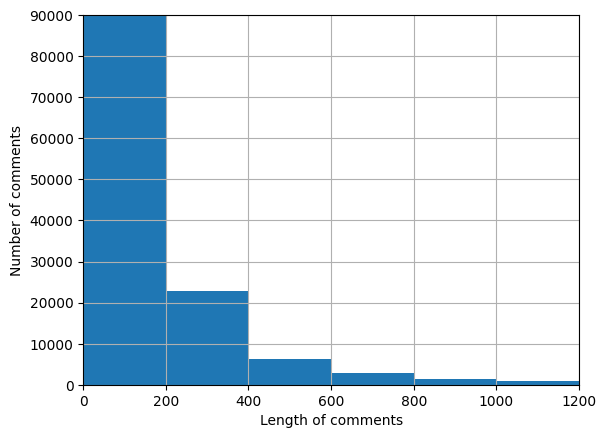

In [32]:
x = [len(train_texts[i]) for i in range(len(train_texts))]

print('average length of comment: {:.3f}'.format(sum(x)/len(x)) )
bins = [1,200,400,600,800,1000,1200]
plt.hist(x, bins=bins)
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer  
tok = Tokenizer(num_words=1000, oov_token='UNK')
#tok = Tokenizer(oov_token='UNK')
tok.fit_on_texts(train_texts + test_texts)
# Extract binary BoW features
x_train = tok.texts_to_matrix(train_texts, mode='tfidf')
x_test = tok.texts_to_matrix(test_texts, mode='tfidf')


2025-08-23 09:32:25.098861: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755941545.112768       8 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755941545.117130       8 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 09:32:25.136407: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [34]:
y_train = np.asarray(label.values).astype('float32')


In [35]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(159571, 1000)
(159571, 6)
(153164, 1000)


In [36]:
from sklearn.model_selection import train_test_split
tr_X, val_X, tr_y, val_y = train_test_split(x_train, y_train, train_size=0.95, random_state=42)


In [37]:
print(tr_X.shape)
print(tr_y.shape)
print(val_X.shape)
print(val_y.shape)


(151592, 1000)
(151592, 6)
(7979, 1000)
(7979, 6)


In [38]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(tr_X,
                    tr_y,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_X, val_y))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-23 09:32:47.982276: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.7928 - loss: 0.4013 - val_binary_accuracy: 0.9774 - val_loss: 0.0924
Epoch 2/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9782 - loss: 0.0850 - val_binary_accuracy: 0.9797 - val_loss: 0.0739
Epoch 3/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_accuracy: 0.9796 - loss: 0.0692 - val_binary_accuracy: 0.9798 - val_loss: 0.0680
Epoch 4/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9801 - loss: 0.0644 - val_binary_accuracy: 0.9801 - val_loss: 0.0652
Epoch 5/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9806 - loss: 0.0604 - val_binary_accuracy: 0.9802 - val_loss: 0.0637
Epoch 6/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9808 - loss: 0.0588 - val_binary_accuracy: 0.9804 - val_loss: 0.0629
Epoch 7/20
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9811 - loss: 0.0571 - val_binary_accuracy: 0.9801 - val_loss: 0.0628
Epoch 

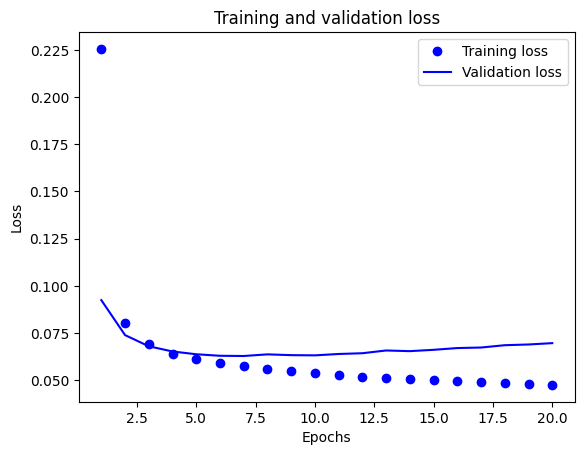

In [39]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


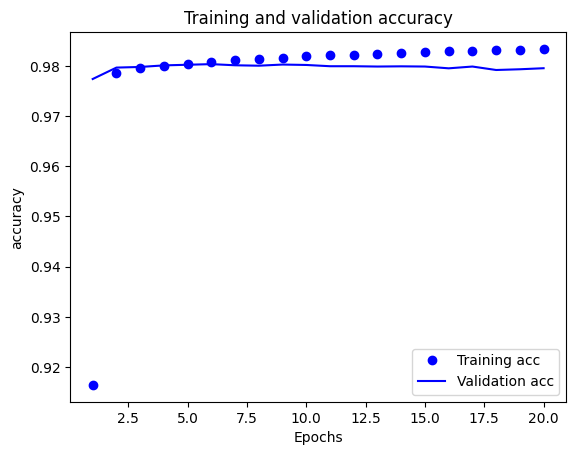

In [40]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()


In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(6, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(tr_X,
                    tr_y,
                    epochs=9,
                    batch_size=512,
                    validation_data=(val_X, val_y))
# compute roc_auc score  
from sklearn.metrics import roc_auc_score
y_pred = model.predict(val_X)
roc_auc_score(val_y, y_pred)


Epoch 1/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - binary_accuracy: 0.8458 - loss: 0.3710 - val_binary_accuracy: 0.9737 - val_loss: 0.0874
Epoch 2/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9771 - loss: 0.0782 - val_binary_accuracy: 0.9797 - val_loss: 0.0684
Epoch 3/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9792 - loss: 0.0654 - val_binary_accuracy: 0.9806 - val_loss: 0.0646
Epoch 4/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9798 - loss: 0.0620 - val_binary_accuracy: 0.9805 - val_loss: 0.0637
Epoch 5/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9803 - loss: 0.0596 - val_binary_accuracy: 0.9805 - val_loss: 0.0628
Epoch 6/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9805 - loss: 0.0579 - val_binary_accuracy: 0.9808 - val_loss: 0.0624
Epoch 7/9
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9806 - loss: 0.0569 - val_binary_accuracy: 0.9806 - val_loss: 0.0624
Epoch 8/9
297

0.9589057876031072

In [42]:
#How to create a submission csv file for Kaggle
df_sample = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip")
y_pred = model.predict(x_test)
df_sample[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]] = y_pred
df_sample.to_csv('submission.csv', index=False)


4787/4787 ━━━━━━━━━━━━━━━━━━━━ 2s 350us/step
